In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

# change current working directory to the root of the project
import os
os.chdir(os.path.dirname(os.getcwd()))

# Purpose
- Purpose of this notebook is to build baseline models

In [2]:
import warnings
from IPython.display import display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import brier_score_loss
from sklearn.metrics import confusion_matrix

In [3]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)

/var/folders/rx/jl4f7yr95xd03cgb4sg2w99h0000gn/T/ipykernel_1527/4075833985.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


# Load Data

In [4]:
nrows = None
X_train = pd.read_csv("data/transformed/X_train.csv", nrows=nrows)
X_test = pd.read_csv("data/transformed/X_test.csv", nrows=nrows)

y_train = pd.read_csv("data/transformed/y_train.csv", nrows=nrows)
y_test = pd.read_csv("data/transformed/y_test.csv", nrows=nrows)

display(X_test.head())
display(y_test.head())

,customer_ID,B_30_count,B_30_last,B_30_first,B_30_nunique,B_38_count,B_38_last,B_38_first,B_38_nunique,D_114_count,...,D_141_sub,D_141_frac,D_142_sub,D_142_frac,D_143_sub,D_143_frac,D_144_sub,D_144_frac,D_145_sub,D_145_frac
0,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,13,0.0,0.0,1,13,5.0,1.0,3,11,...,0.001539,1.265030,NaN,NaN,-0.000028,0.995717,-0.007654,0.027910,0.001819,1.832629
1,c34b0cf3175108892e42e9382e8177847ac15636870604...,3,0.0,0.0,1,3,4.0,1.0,2,1,...,-0.002279,0.751526,NaN,NaN,-0.003474,0.475973,0.002824,1.566516,-0.007112,0.070716
2,14aff3c0e0ed2aaaef6deb127f2541b67fdd0002615bfd...,13,1.0,2.0,3,13,3.0,3.0,2,13,...,0.020072,1.022241,0.052345,1.21339,0.003577,1.003564,-0.213398,0.641255,-0.091631,0.505844
3,f82be644eb90ab65d737b6dfc5de670559fa2ca23c98ea...,13,0.0,0.0,1,13,2.0,1.0,2,13,...,-0.000378,0.919788,NaN,NaN,0.004012,2.043321,0.001460,2.007422,0.002279,1.546141
4,09dec6d53f0f12db6edcaecbb4d2bddf41f220ba9569d1...,13,0.0,0.0,1,13,1.0,2.0,2,13,...,-0.004239,0.356514,NaN,NaN,0.008933,78.804175,0.004662,30.032338,-0.003442,0.083617


,target
0,0
1,1
2,0
3,0
4,0


# Baseline Model 1
- Zero-Rate Model
- Predcit the most frequent class

In [5]:
class BaselineModelZeroR:
    '''ZeroR baseline model that always predicts the most frequent class'''
    
    def fit(self, X_train: pd.DataFrame, y_train: pd.Series):
        pass
        
    def predict(self, X: pd.DataFrame, y: pd.DataFrame) -> pd.DataFrame:

        # merge X and y on index
        df = X.merge(y, left_index=True, right_index=True)

        # get the most frequent class
        most_frequent_class = df["target"].value_counts().index[0]

        # create predictions
        predictions = [most_frequent_class] * len(df)

        return np.array(predictions)

In [6]:
model = BaselineModelZeroR()
model.fit(X_train, y_train)
predictions_baseline_model_1 = model.predict(X_test, y_test)

print(f"Brier: {brier_score_loss(y_test, predictions_baseline_model_1)}")

Brier: 0.25650719632175895


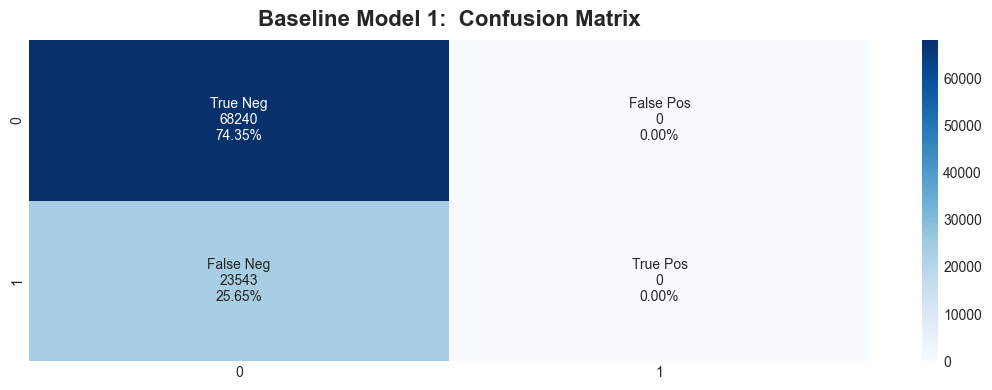

In [7]:
cf_matrix = confusion_matrix(y_test, predictions_baseline_model_1)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_cots = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_cots,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.title('Baseline Model 1:  Confusion Matrix')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.tight_layout()

# Baseline Model 2
- Random-Rate Model
- Predicts a random class with the same probability as the most frequent class

In [8]:
class BaselineModelRandom:
    '''Random baseline model that randomly predicts 0 or 1 based on the distribution of the training set'''

    def fit(self, X_train: pd.DataFrame, y_train: pd.Series):
        pass
        
    def predict(self, X: pd.DataFrame, y: pd.DataFrame) -> pd.DataFrame:

        # merge X and y on index
        df = X.merge(y, left_index=True, right_index=True)

        # predict 0 or 1 based on the distribution of the training set
        predictions = np.random.choice([0, 1], size=len(df), p=df["target"].value_counts(normalize=True))

        return np.array(predictions)

In [9]:
model = BaselineModelRandom()
model.fit(X_train, y_train)
predictions_baseline_model_2 = model.predict(X_test, y_test)

print(f"Brier: {brier_score_loss(y_test, predictions_baseline_model_2)}")

Brier: 0.381715568242485


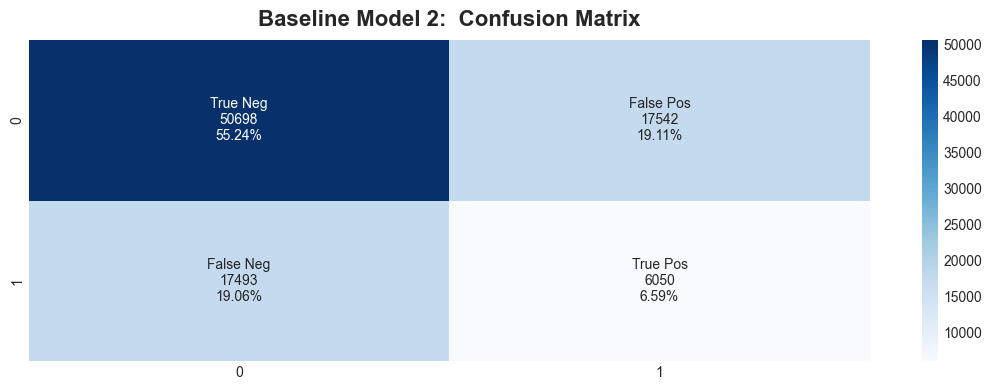

In [10]:
cf_matrix = confusion_matrix(y_test, predictions_baseline_model_2)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_cots = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_cots,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.title('Baseline Model 2:  Confusion Matrix')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.tight_layout()

In [12]:
# save predictions
pd.DataFrame(predictions_baseline_model_2).to_csv("predictions/predictions_baseline_model_2.csv", index=False)

# save predictions
pd.DataFrame(predictions_baseline_model_1).to_csv("predictions/predictions_baseline_model_1.csv", index=False)
